# Multivariable Interpolation

Author: Luke Vaughan

Course: MATH 545 Numerical Analysis I (College of Charleston, Spring 2021)

Instructor: Daniel Poll

#### Setup

The following code is written for the purpose of constructing an interpolating polynomial $p_{n,m}(x,y)$ to approximate the surface $f(x,y) = e^x \sin y$. The interpolating polynomial, written in its general form, is given as

$$p_{n,m}(x,y) = \sum_{i=0}^{n} \sum_{j=0}^{m} c_{i,j} x^i y^j$$

where $c_{i,j} \in \mathbb{R}$. If we choose to construct a quadratic polynomial, with $n = m = 2$, we have

$$\begin{align*}
p_{2,2}(x,y) = & \text{ } c_{0,0} + c_{0,1}y + c_{0,2}y^2 \\
& + c_{1,0}x + c_{1,1}xy + c_{1,2}xy^2 \\
& + c_{2,0}x^2 + c_{2,1}x^2 y + c_{2,2}x^2 y^2
\end{align*}$$

Our goal is to use $p_{2,2}(x,y)$ to approximate $f(x,y)$ as closely as possible. So we are looking for the best possible values for the coefficients. To find these values, we can evaluate $p_{2,2}(x,y)$ and $f(x,y)$ at a few points in the $xy$-plane, and assert that the results must be the same. The points we choose, $\left\{(x_0,y_0),(x_1,y_1),...,(x_8,y_8)\right\}$, are called "nodes." See plot below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

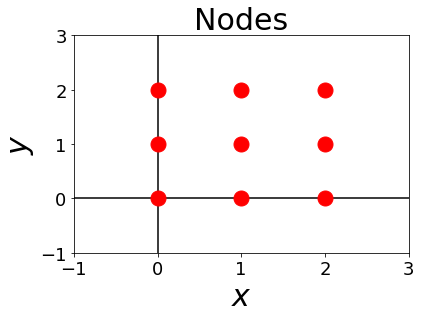

In [2]:
#Visualize nodes

fig, ax = plt.subplots()

x_vals_nodes = np.linspace(0,2,3)  #vector [0,1,2]
y_vals_nodes = np.linspace(0,2,3)  #vector [0,1,2]

plt.title('Nodes', fontsize = 30)
plt.xlabel('$x$', fontsize = 30)
plt.ylabel('$y$', fontsize = 30)

plt.xlim(-1,3)
plt.ylim(-1,3)

plt.xticks(size=18)
plt.xticks([-1,0,1,2,3])
plt.yticks(size=18)
plt.yticks([-1,0,1,2,3])

ax.axvline(x = 0, color = 'black')
ax.axhline(y = 0, color = 'black') 

#Use double for loop to plot nodes

for i in range(len(x_vals_nodes)):
    for j in range(len(y_vals_nodes)):
        ax.plot(x_vals_nodes[i], y_vals_nodes[j], 'ro', markersize = 15)

We are asserting that we must get the same values when we evaluate $p_{2,2}(x,y)$ and $f(x,y)$ at the nodes. Mathematically, this equates to setting up and solving the linear system 

$$\begin{align*}
p_{2,2}(x_0,y_0) & = f(x_0,y_0) \\
p_{2,2}(x_1,y_1) & = f(x_1,y_1) \\
& \; \vdots \\
p_{2,2}(x_8,y_8) & = f(x_8,y_8)
\end{align*}$$

We can rewrite this system as the matrix equation $A\vec{x} = \vec{b}$ where $A$ is the Vandermonde matrix, $\vec{x}$ is the vector of coefficients, and $\vec{b}$ is the vector of values we get from evaluating $f(x,y)$ at the nodes. Solving the matrix equation for $\vec{x}$ will give us the desired values for the coefficients. Since $p_{2,2}(x,y)$ is quadratic, the matrix equation $A\vec{x} = \vec{b}$ is given as 

$$\begin{bmatrix} 1 & y_0 & y_0^2 & x_0 & x_0 y_0 & x_0 y_0^2 & x_0^2 & x_0^2 y_0 & x_0^2 y_0^2 \\ 1 & y_1 & y_1^2 & x_1 & x_1 y_1 & x_1 y_1^2 & x_1^2 & x_1^2 y_1 & x_1^2 y_1^2 \\ \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\ 1 & y_8 & y_8^2 & x_8 & x_8 y_8 & x_8 y_8^2 & x_8^2 & x_8^2 y_8 & x_8^2 y_8^2 \end{bmatrix} \text{ } \begin{bmatrix} c_{0,0} \\ c_{0,1} \\ \vdots \\ c_{2,2} \end{bmatrix} \text{ } = \text{ } \begin{bmatrix} e^{x_0}\sin y_0 \\ e^{x_1}\sin y_1 \\ \vdots \\ e^{x_8}\sin y_8 \end{bmatrix}$$

We are evaluating $p_{2,2}(x,y)$ and $f(x,y)$ at the nodes $\left\{(\color{red}{0},\color{red}{0}), (\color{red}{1},\color{red}{0}), (\color{red}{2},\color{red}{0}), (\color{red}{0},\color{red}{1}), (\color{red}{1},\color{red}{1}), (\color{red}{2},\color{red}{1}), (\color{red}{0},\color{red}{2}), (\color{red}{1},\color{red}{2}), (\color{red}{2},\color{red}{2})\right\}$. Plugging in these values, we obtain

$$\begin{bmatrix} 1 & \color{red}{0} & \color{red}{0}^2 & \color{red}{0} & \color{red}{0} \cdot \color{red}{0} & \color{red}{0} \cdot \color{red}{0}^2 & \color{red}{0}^2 & \color{red}{0}^2 \cdot \color{red}{0} & \color{red}{0}^2 \cdot \color{red}{0}^2 \\ 1 & \color{red}{0} & \color{red}{0}^2 & \color{red}{1} & \color{red}{1} \cdot \color{red}{0} & \color{red}{1} \cdot \color{red}{0}^2 & \color{red}{1}^2 & \color{red}{1}^2 \cdot \color{red}{0} & \color{red}{1}^2 \cdot \color{red}{0}^2 \\ \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\ 1 & \color{red}{2} & \color{red}{2}^2 & \color{red}{2} & \color{red}{2} \cdot \color{red}{2} & \color{red}{2} \cdot \color{red}{2}^2 & \color{red}{2}^2 & \color{red}{2}^2 \cdot \color{red}{2} & \color{red}{2}^2 \cdot \color{red}{2}^2 \end{bmatrix} \text{ } \begin{bmatrix} c_{0,0} \\ c_{0,1} \\ \vdots \\ c_{2,2} \end{bmatrix} \text{ } = \text{ } \begin{bmatrix} e^{\color{red}{0}} \sin \color{red}{0} \\ e^{\color{red}{1}} \sin \color{red}{0} \\ \vdots \\ e^{\color{red}{2}} \sin \color{red}{2} \end{bmatrix}$$

which gives us the matrix equation

$$\begin{bmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 1 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 \\ 1 & 0 & 0 & 2 & 0 & 0 & 4 & 0 & 0 \\ 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 2 & 2 & 2 & 4 & 4 & 4 \\ 1 & 2 & 4 & 0 & 0 & 0 & 0 & 0 & 0 \\ 1 & 2 & 4 & 1 & 2 & 4 & 1 & 2 & 4 \\ 1 & 2 & 4 & 2 & 4 & 8 & 4 & 8 & 16 \end{bmatrix} \text{ } \begin{bmatrix} c_{0,0} \\ c_{0,1} \\ c_{0,2} \\ c_{1,0} \\ c_{1,1} \\ c_{1,2} \\ c_{2,0} \\ c_{2,1} \\ c_{2,2} \end{bmatrix} \text{ } = \text{ } \begin{bmatrix} 0 \\ 0 \\ 0 \\ \sin 1 \\ e \sin 1 \\ e^2 \sin 1 \\ \sin 2 \\ e \sin 2 \\ e^2 \sin 2 \end{bmatrix}$$

#### Solving the Linear System

The matrix equation $A\vec{x} = \vec{b}$ is solved below.

In [3]:
#Vandermonde matrix

A = np.array([[1,0,0,0,0,0,0,0,0],[1,0,0,1,0,0,1,0,0],[1,0,0,2,0,0,4,0,0],[1,1,1,0,0,0,0,0,0],[1,1,1,1,1,1,1,1,1],[1,1,1,2,2,2,4,4,4],[1,2,4,0,0,0,0,0,0],[1,2,4,1,2,4,1,2,4],[1,2,4,2,4,8,4,8,16]],dtype='float')

#Vector of surface values 

b = np.array([0,0,0,np.sin(1),np.exp(1)*np.sin(1),np.exp(2)*np.sin(1),np.sin(2),np.exp(1)*np.sin(2),np.exp(2)*np.sin(2)],dtype='float')

In [4]:
#Solution to matrix equation

Ainv = la.inv(A)
x = Ainv@b

print(x)  #vector of coefficients

[ 0.          1.22829326 -0.38682227  0.          0.2972907  -0.09362476
  0.          1.81326328 -0.57104492]


#### Results

The coefficients, rounded to five decimal places, are given as

$$
\begin{align*} 
c_{0,0} & = 0 \\
c_{0,1} & = 1.22829 \\ 
c_{0,2} & = -0.38682 \\ 
c_{1,0} & = 0 \\ 
c_{1,1} & = 0.29729 \\ 
c_{1,2} & = -0.09362 \\ 
c_{2,0} & = 0 \\ 
c_{2,1} & = 1.81326 \\ 
c_{2,2} & = -0.57104
\end{align*}
$$

Use these coefficients to construct the interpolating polynomial:

$$\begin{align*}
p_{2,2}(x,y) = & \text{ } 1.22829 y - 0.38682y^2 \\
& + 0.29729 xy - 0.09362 xy^2 \\
& + 1.81326 x^2 y - 0.57104 x^2 y^2
\end{align*}$$

#### Plots

The surface $f(x,y)$ and the interpolating polynomial $p_{2,2}(x,y)$ are plotted below. As we can see, $f(x,y)$ is approximated fairly well by $p_{2,2}(x,y)$.

In [5]:
#Surface

def f(x,y):
    return np.exp(x)*np.sin(y) 

#Interpolating polynomial

def p(x,y):
    return (1.22829*y) - (0.38682*(y**2)) + (0.29729*x*y) - (0.09362*x*(y**2)) + (1.81326*(x**2)*y) - (0.57104*(x**2)*(y**2))

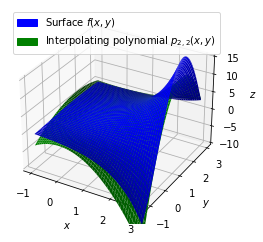

In [6]:
#Plot

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x = np.arange(-1,3,0.01)
y = np.arange(-1,3,0.01)
(X,Y) = np.meshgrid(x,y)

S = f(X,Y)  #surface
IP = p(X,Y)  #interpolating polynomial

ax.plot_surface(X,Y,S,color='blue')  #plot surface
ax.plot_surface(X,Y,IP,color='green')  #plot interpolating polynomial

legend_elements = [
    mpatches.Patch(color='blue', label='Surface $f(x,y)$'),
    mpatches.Patch(color='green', label='Interpolating polynomial $p_{2,2}(x,y)$')
]
ax.legend(handles=legend_elements)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_zlim(-10, 15)

plt.show()